In [48]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import re

In [49]:
data2 = pd.read_csv('metformin.csv')
data2.head()

,date,effectiveness_ratings,usage_ratings,duration,satisfaction_ratings,comment,gender,age_range,condition,consumer
0,8/2/18,3,4,less than 1 month,1,"I took 1 dose, and my entire GI system suffere...",Female,25-34,\r\n\t\t\t\t\tCondition: Type 2 Diabetes Mellitus,Patient
1,6/30/18,5,5,1 to 6 months,1,"I took 1 dose, and my entire GI system suffere...",NaN,55-64,\r\n\t\t\t\t\tCondition: Type 2 Diabetes Mellitus,Patient
2,5/6/18,3,3,less than 1 month,4,I started taking this twice a day. 500 mg twi...,NaN,65-74,\r\n\t\t\t\t\tCondition: Type 2 Diabetes Mellitus,Patient
3,3/14/18,3,3,2 to less than 5 years,2,I started taking this twice a day. 500 mg twi...,NaN,65-74,\r\n\t\t\t\t\tCondition: Type 2 Diabetes Mellitus,Patient
4,12/25/17,5,1,1 to 6 months,1,Blood glucose ranging from 170-300 both AM and...,NaN,45-54,\r\n\t\t\t\t\tCondition: Type 2 Diabetes Mellitus,Patient


In [50]:
data2['condition'] = data2['condition'].apply(lambda x: str(x)[-24:])

In [56]:
def dur(text):
    new_duration = ''.join(re.findall('[0-9]+',text))
    if new_duration == '1':
        return .1
    elif new_duration == '16':
        return .3
    elif new_duration == '61':
        return 0.75
    elif new_duration == '12':
        return 1.5
    elif new_duration == '25':
        return 3.5
    elif new_duration == '510':
        return 7.5
    else:
        return ''
data2['average_duration'] = [dur(x) for x in data2['duration']]

In [57]:
data2.head()

,date,effectiveness_ratings,usage_ratings,duration,satisfaction_ratings,comment,gender,age_range,condition,consumer,adjusted_duration,average_duration
0,8/2/18,3,4,less than 1 month,1,"I took 1 dose, and my entire GI system suffere...",Female,25-34,Type 2 Diabetes Mellitus,Patient,0.1,0.1
1,6/30/18,5,5,1 to 6 months,1,"I took 1 dose, and my entire GI system suffere...",NaN,55-64,Type 2 Diabetes Mellitus,Patient,0.3,0.3
2,5/6/18,3,3,less than 1 month,4,I started taking this twice a day. 500 mg twi...,NaN,65-74,Type 2 Diabetes Mellitus,Patient,0.1,0.1
3,3/14/18,3,3,2 to less than 5 years,2,I started taking this twice a day. 500 mg twi...,NaN,65-74,Type 2 Diabetes Mellitus,Patient,3.5,3.5
4,12/25/17,5,1,1 to 6 months,1,Blood glucose ranging from 170-300 both AM and...,NaN,45-54,Type 2 Diabetes Mellitus,Patient,0.3,0.3


In [54]:
data2['age_range'].astype('category', categories=['5-14','15-24','25-34','35-44','45-54','55-64','65-74','75-84'], ordered=True)


/Users/oluwolealowolodu/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """Entry point for launching an IPython kernel.


0      25-34
1      55-64
2      65-74
3      65-74
4      45-54
5      65-74
6      55-64
7      25-34
8      35-44
9      65-74
10     45-54
11     65-74
12     55-64
13     45-54
14     45-54
15     55-64
16     55-64
17     45-54
18     55-64
19     45-54
20     45-54
21     65-74
22     55-64
23     65-74
24     55-64
25     45-54
26     45-54
27     55-64
28     45-54
29     65-74
       ...  
851    55-64
852    45-54
853    55-64
854    55-64
855    45-54
856    65-74
857    65-74
858    65-74
859    45-54
860    45-54
861    55-64
862    35-44
863    55-64
864    55-64
865    65-74
866    55-64
867    45-54
868    45-54
869    55-64
870    45-54
871      NaN
872      NaN
873    45-54
874    65-74
875    65-74
876    45-54
877    55-64
878      NaN
879    65-74
880    55-64
Name: age_range, Length: 881, dtype: category
Categories (8, object): [5-14 < 15-24 < 25-34 < 35-44 < 45-54 < 55-64 < 65-74 < 75-84]

In [58]:
data2['average_duration']=data2['average_duration'].astype('category', categories=[0.1,0.3,0.75,1.5,3.5,7.5], ordered=True)


/Users/oluwolealowolodu/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """Entry point for launching an IPython kernel.


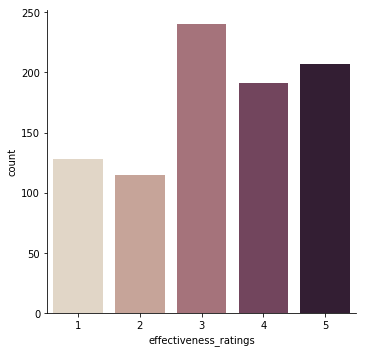

In [46]:
sns.catplot(x="effectiveness_ratings", kind="count", palette="ch:.25", data=data2);


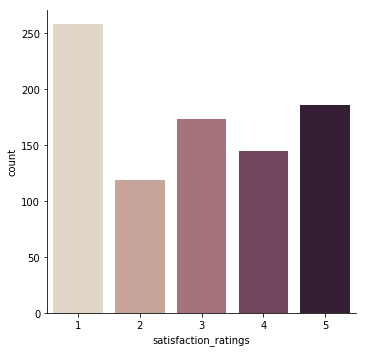

In [47]:
sns.catplot(x="satisfaction_ratings", kind="count", palette="ch:.25", data=data2);


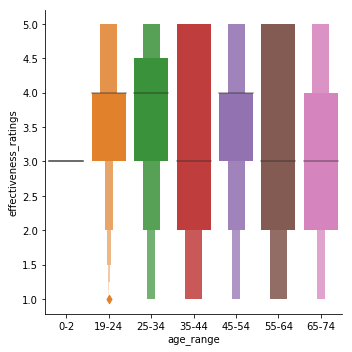

In [32]:

sns.catplot(x="age_range", y="effectiveness_ratings", kind='boxen', data=data2.sort_values('age_range'));


/Users/oluwolealowolodu/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


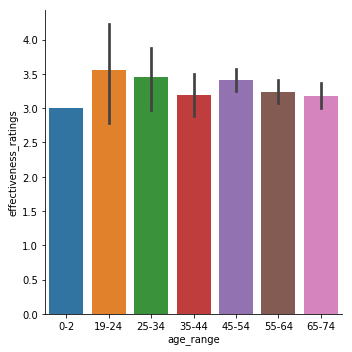

In [59]:
sns.catplot(x="age_range", y="effectiveness_ratings", kind='bar', data=data2.sort_values('age_range'));


/Users/oluwolealowolodu/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


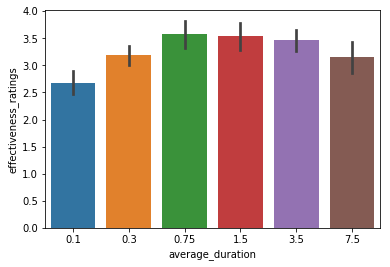

In [62]:
sns.barplot(x="average_duration", y="effectiveness_ratings",data=data2, orient='v')


/Users/oluwolealowolodu/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


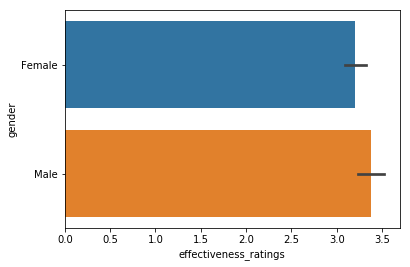

In [22]:
sns.barplot(x="effectiveness_ratings", y="gender",data=data2, orient='h')


/Users/oluwolealowolodu/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


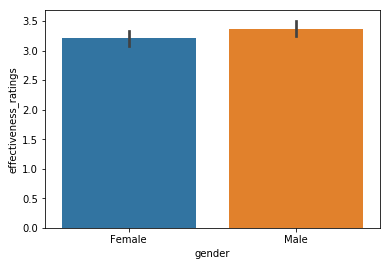

In [63]:
sns.barplot(x="gender", y="effectiveness_ratings",data=data2, orient='v')
